In [1]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/Users/jreadey/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# Open the wind data "file"
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/wind-us.h5", 'r')  

In [3]:
f.attrs['history']   # attributes can be used to provide desriptions of the content

'Produced by 3TIER, Inc. under NREL subcontract AGV-2-22460-01'

In [4]:
list(f)  # list the datasets in the file

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

In [5]:
dset = f['windspeed_60m']

In [6]:
dset.id.id  # if this is an int, then you are using h5py!

'd-63038e98-4c15-11e7-81a9-0242ac110008'

In [7]:
dset.shape

(8760, 1602, 2976)

In [8]:
dset.dtype

dtype('float32')

In [9]:
dset.chunks

[32, 50, 186]

In [10]:
dset.shape[0] * dset.shape[1] * dset.shape[2] * 4  # 155 GB!

167055022080

In [11]:
(dset.shape[0] * dset.shape[1] * dset.shape[2]) // (dset.chunks[0] * dset.chunks[1] * dset.chunks[2])  # lots a chunks

140335

In [12]:
dset.shape[1] * dset.shape[2] * 4  # 18 MB per slice

19070208

In [13]:
%time data = dset[1797,::8,::8]

CPU times: user 8.64 ms, sys: 3.82 ms, total: 12.5 ms
Wall time: 5.88 s


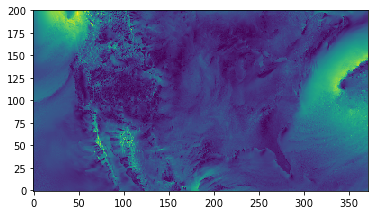

In [14]:
plt.imshow(data, origin="lower")

In [15]:
%time data = dset[2199,1100:1400,2000:2400]  # full-rez subset

CPU times: user 8.9 ms, sys: 3.96 ms, total: 12.9 ms
Wall time: 1.31 s


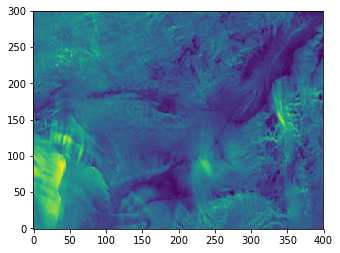

In [16]:
plt.imshow(data, origin="lower")

In [17]:
%time tseries = dset[:, 891, 600]

CPU times: user 3.94 ms, sys: 1.16 ms, total: 5.11 ms
Wall time: 2.06 s


In [18]:
len(tseries)   # 365 days * 24 hours

8760

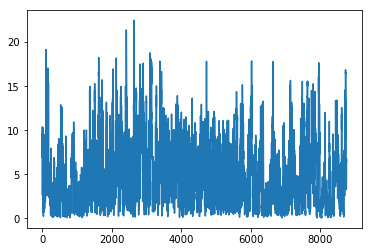

In [19]:
x = range(dset.shape[0])
plt.plot(x, tseries)

In [ ]:
datetime = f['datetime']

In [ ]:
datetime.shape

In [ ]:
datetime[:12]